# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [4]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


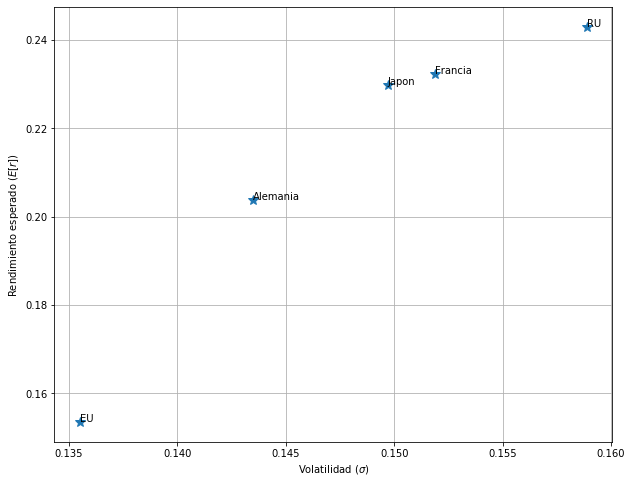

In [6]:
import matplotlib.pyplot as plt
# Puntos a graficar
x_points=annual_ret_summ.loc['Media']
y_points=annual_ret_summ.loc['Volatilidad']

# Ventana para graficar
plt.figure(figsize=(10,8))
# Graficar puntos
plt.plot(x_points,y_points,'*',ms=10)
##### ms es el tamaño de los puntos en la grafica
plt.grid()
# Etiquetas de los ejes
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')

# Etiqueta de cada instrumento
plt.text(x_points[0],y_points[0],'EU')
plt.text(x_points[1],y_points[1],'RU')
plt.text(x_points[2],y_points[2],'Francia')
plt.text(x_points[3],y_points[3],'Alemania')
plt.text(x_points[4],y_points[4],'Japon')
plt.show()

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [7]:
# Vector de w variando entre 0 y 1 con N pasos
N= 101
w= np.linspace (start=0, stop=1, num=N)

# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
E1 = annual_ret_summ.loc['Media','RU']
E2 = annual_ret_summ.loc['Media','Japon']
# Volatilidades individuales
s1=annual_ret_summ.loc['Volatilidad','RU']
s2=annual_ret_summ.loc['Volatilidad','Japon']
# Correlacion
r12=corr.loc['RU', 'Japon']
E1, E2, s1, s2, r12

(0.1589, 0.1497, 0.243, 0.2298, 0.3581)

In [9]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame({'w':w,
                            'Media' : w*E1 + (1-w) *E2, 
                            'Volatilidad' : ((w*s1)**2 + ((1-w)*s2)**2 + 2*w*(1-w)*s1*s2*r12)**.5
                            },
                           index=range(1, N+1)
                           )
portafolios2

,w,Media,Volatilidad
1,0.00,0.149700,0.229800
2,0.01,0.149792,0.228383
3,0.02,0.149884,0.226990
4,0.03,0.149976,0.225619
5,0.04,0.150068,0.224272
...,...,...,...
97,0.96,0.158532,0.236727
98,0.97,0.158624,0.238266
99,0.98,0.158716,0.239824
100,0.99,0.158808,0.241402


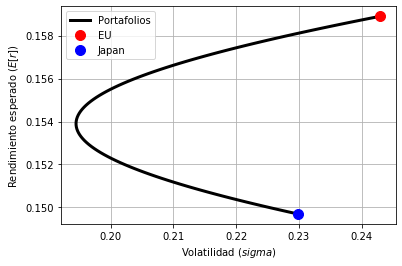

In [10]:
plt.plot(portafolios2['Volatilidad'],
        portafolios2['Media'],
        'k', lw=3, label='Portafolios'
        )
#lw: line width
plt.plot(s1, E1, 'or', ms=10, label='EU')
plt.plot(s2, E2, 'ob', ms=10, label='Japan')
plt.legend(loc='best')
plt.grid()
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.show()

# Punto 2

In [11]:
# Calcular w_minvar y mostrar...
s12 = r12 *s1*s2
w_minvar = (s2**2-s12)/(s1**2+s2**2-2*s12)
w_minvar, 1-w_minvar

(0.4565776358082657, 0.5434223641917343)

Conclusion: Para obtener el portafolio de minima varianza deberiamos invertir el 45% en Reino Unido y el 54% en Japon

# Utilizando Minimize

In [12]:
# Importar el módulo optimize
from scipy.optimize import minimize

In [13]:
# Función objetivo
def varianza(w, s1, s2, s12):
    w1 = w[0]
    w2 = w[1]
    return (s1 * w1)**2 + (s2 * w2)**2 + 2 * w1 * w2 *s12

In [14]:
# Dato inicial
w0 = [0.5, 0.5]
# Volatilidades individuales
# s1, s2
# Correlacion
# r12
# Covarianza
s12 = r12 * s1 * s2
# Cota de w
bnds = ((0, None),) * 2
# Restricciones con diccionario: {}, eq-equality, fun-funcion
cons = {'type' : 'eq', 'fun': lambda w: w.sum() -1}

In [15]:
# Solución
minvar2 = minimize (fun=varianza,
                    x0 = w0,
                    args = (s1,s2,s12), #variables involucradas pero que no se esta trabajando en ellas
                    bounds = bnds,
                    constraints=cons)
minvar2

     fun: 0.03782716405098699
     jac: array([0.07565433, 0.07565433])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.45657765, 0.54342235])

In [16]:
# Peso del portafolio de minima varianza
minvar2.x

array([0.45657765, 0.54342235])

In [17]:
#Valor esperado y Volatilidad
E_minvar = w_minvar * E1 + (1- w_minvar) * E2
s_minvar = varianza([w_minvar, 1- w_minvar], s1, s2, s12)**.5
E_minvar, s_minvar

(0.15390051424943607, 0.19449206680733014)

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [24]:
# Calcular w_minvar y mostrar...
s13 = 0.5 *s1*s2
w_minvar = (s2**2-s13)/(s1**2+s2**2-2*s13)
w_minvar, 1-w_minvar

(0.4442927011099044, 0.5557072988900956)

In [25]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios3 = pd.DataFrame({'w':w,
                            'Media' : w*E1 + (1-w) *E2, 
                            'Volatilidad' : ((w*s1)**2 + ((1-w)*s2)**2 + 2*w*(1-w)*s1*s2*0.5)**.5
                            },
                           index=range(1, N+1)
                           )
portafolios3

,w,Media,Volatilidad
1,0.00,0.149700,0.229800
2,0.01,0.149792,0.228727
3,0.02,0.149884,0.227673
4,0.03,0.149976,0.226639
5,0.04,0.150068,0.225625
...,...,...,...
97,0.96,0.158532,0.238009
98,0.97,0.158624,0.239232
99,0.98,0.158716,0.240471
100,0.99,0.158808,0.241727


In [26]:
# Solución
minvar3 = minimize (fun=varianza,
                    x0 = w0,
                    args = (s1,s2,s13), #variables involucradas pero que no se esta trabajando en ellas
                    bounds = bnds,
                    constraints=cons)
minvar3

     fun: 0.04175077648795944
     jac: array([0.08350155, 0.08350155])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.4442927, 0.5557073])

In [27]:
#Valor esperado y Volatilidad
E_minvar3 = w_minvar * E1 + (1- w_minvar) * E2
s_minvar3= varianza([w_minvar, 1- w_minvar], s1, s2, s12)**.5
E_minvar3, s_minvar3

(0.15378749285021112, 0.2043300675083318)

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

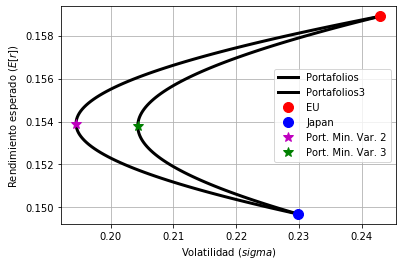

In [32]:
plt.plot(portafolios2['Volatilidad'],
        portafolios2['Media'],
        'k', lw=3, label='Portafolios'
        )
plt.plot(portafolios3['Volatilidad'],
        portafolios3['Media'],
        'k', lw=3, label='Portafolios3'
        )
#lw: line width
plt.plot(s1, E1, 'or', ms=10, label='EU')
plt.plot(s2, E2, 'ob', ms=10, label='Japan')
plt.plot(s_minvar, E_minvar, '*m', ms=10, label='Port. Min. Var. 2')
plt.plot(s_minvar3, E_minvar3, '*g', ms=10, label='Port. Min. Var. 3')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.show()

In [33]:
minvar2.x, minvar3.x

(array([0.45657765, 0.54342235]), array([0.4442927, 0.5557073]))

In [37]:
print ('El rend. esperado de portafolio3 es', E_minvar3)
print ('La volatilidad de portafolio3 es', s_minvar3)
print ('El rend. esperado de portafolio2 es',E_minvar)
print ('La volatilidad de portafolio2 es', s_minvar)

El rend. esperado de portafolio3 es 0.15378749285021112
La volatilidad de portafolio3 es 0.2043300675083318
El rend. esperado de portafolio2 es 0.15390051424943607
La volatilidad de portafolio2 es 0.19449206680733014


**CONCLUSION**:Hay mas diversificacion cuando la correlacion entre japon y el RU es menor, Hay menor volatilidad pero el mismo rendimiento. Con esto podemos concluir que el portafolio2 es mejor que el portafolio3 cuando la correlacion es 0.5. El rendimiento esperado es casi igual pero la volatilidad es distinta. Concluimos que los pesos son similares. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>